In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import all required packages

# importing pandas and numpy
import pandas as pd
import numpy as np

# importing sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# r2_score for model evaluation
from sklearn.metrics import r2_score

# importing stastsmodels
import statsmodels.api as sm
# importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data and understanding the dataset

In [3]:
# Importing day.csv
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# lets see the columns information in the dataset
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# lets see the overall description of numeric variables
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Lets see total records and total columns
day.shape

(730, 16)

In [7]:
initialTotalRecords = (day.shape)[0]
initialTotalColumns = (day.shape)[1]

print("Total Rows : ", initialTotalRecords);
print("Total Columns : ", initialTotalColumns);

Total Rows :  730
Total Columns :  16


In [8]:
# Lets see if there are any null data in our dataset or not
round(((day.isnull().sum()/initialTotalRecords)*100), 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

###### Looks like there are no null data in our dataset so we are good to proceed further

In [9]:
# So lets remove some columns which are not useful for our predictions
# instant - Its an index no much significance of it to keep in dataset
# dteday - Its a date column, which is a kind of redundant column because we already have yr and month columns seperately
# casual & registered - It is also kind of redundant columns because its combined count is already mentioned in cnt column. 
#                  And we also need to work on the count of the bikes instead of category count so we can remove this colum
# Lets make a new dataframe without these columns with name 'bike'

bike = day.copy(deep=True) # deep=True, since when we change one data frame other should not get updated/effected by other.
columns_to_remove = ['instant', 'dteday', 'casual', 'registered'];
bike.drop(columns_to_remove, axis = 1, inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
updated_total_records = (bike.shape)[0]
updated_total_columns = (bike.shape)[1]

print("Updated total rows : ", updated_total_records);
print("Updated total columns : ", updated_total_columns);

# Columns were reduced from 16 to 12

Updated total rows :  730
Updated total columns :  12


In [11]:
# Lets check the unique values count for the categorical variables
categorical_columns = ['season', 'mnth', 'weathersit', 'weekday'];
for categorical_col in categorical_columns:
    print(bike[[categorical_col]].value_counts(), "\n");

season
3         188
2         184
1         180
4         178
dtype: int64 

mnth
1       62
3       62
5       62
7       62
8       62
10      62
12      62
4       60
6       60
9       60
11      60
2       56
dtype: int64 

weathersit
1             463
2             246
3              21
dtype: int64 

weekday
0          105
1          105
6          105
2          104
4          104
5          104
3          103
dtype: int64 



### Visualizing the dataset on original data

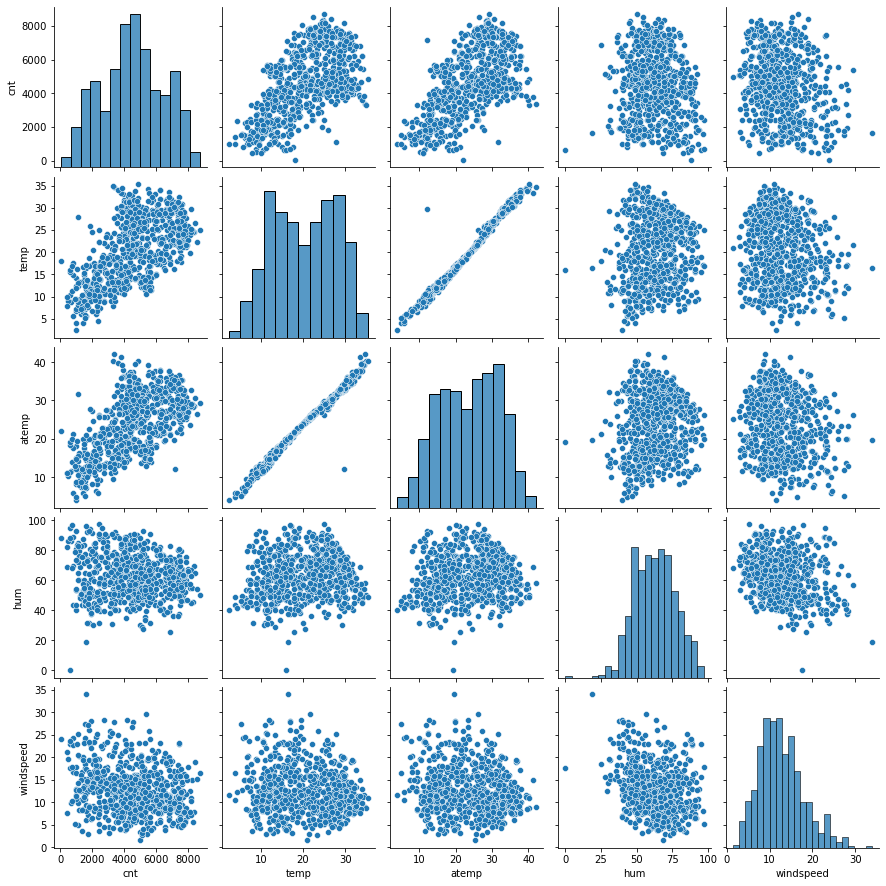

In [12]:
# If we look our data set, it looks like all are numerical data, but actually columns
# 'cnt', 'temp', 'atemp', 'hum', 'windspeed' are actual numeric variable, remaining are numerical categorical variables
# But later on any way we will convert the, to dummy variables so, lets visualize only the actual numeric variables
# For any kind of corelation among them and with target variable 'cnt'
# If no linear relation observed among the cnt and any of the variable then regression model is not possible

numeric_columns = ['cnt', 'temp', 'atemp', 'hum', 'windspeed'];
sns.pairplot(bike[numeric_columns])


#### From the above plots we can observe there is a kind of correlation among
    1. cnt with temp, atemp variables
    2. temp and atemp

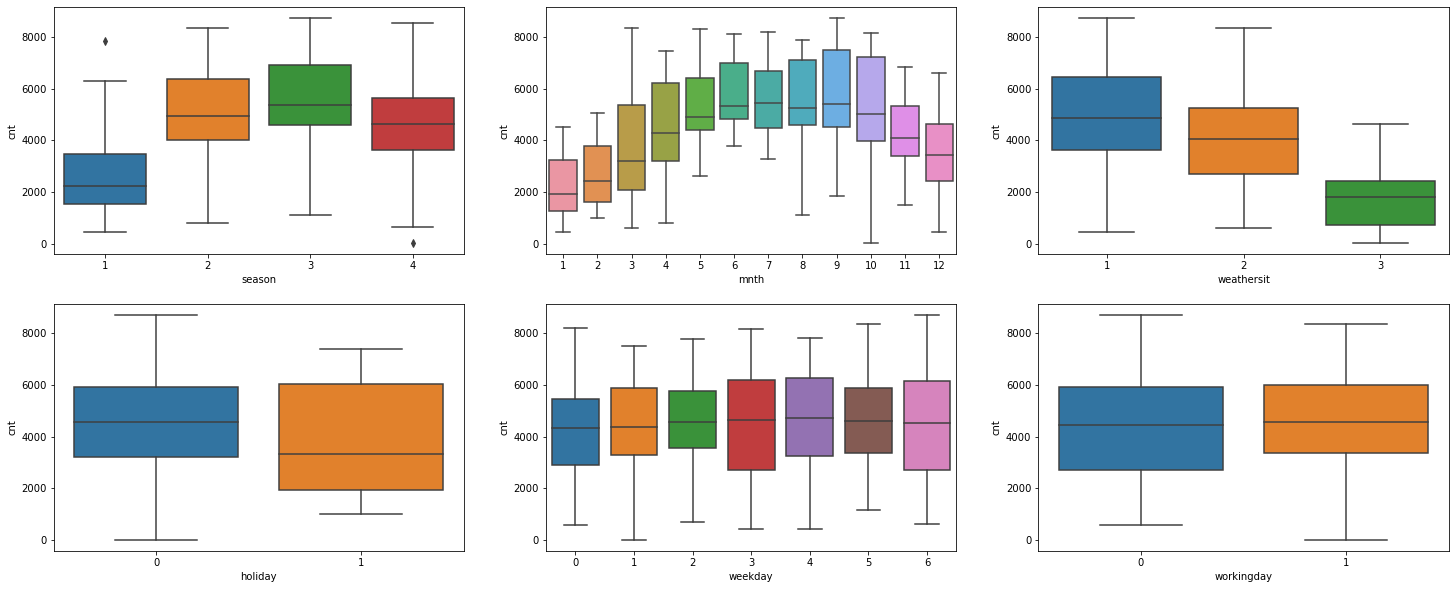

In [13]:
# Visualize the categorical data wrt to target variable cnt before making the dummy data
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

#### We can able to make the following insights from the above box plots wrt to target variable 'cnt'

    1. Working day:
    - Almost 69% of users books bike in working day which is closes to 5000
    - This indicates, workingday can be a good predictor for the dependent variable
    
    2. Weekday:
        - Almost all weekdays, the no.of bike users count was similar and it is around in between 3000-6000
        - Medians of all the weekdays are around in between the 4000-6000 that means, more than 50% of people using bikes in all days of a week irrespective of the day of the week.
        - Difference/distance between the 25% and 75% of box is more for weekdays 3(Wednesday) & 6(Saturday) but not a  significant difference when compared with others [Considering start of week as Sunday]
        
    3. Holiday:
        - Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.
         
    4. Weathersit:
        - Most of the bike users are in weathersit 1(Clear, Few clouds, Partly cloudy, Partly cloudy), followed by 2(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) which is almost 67% of users.
        - This was followed by weathersit2 with 30% of total booking
        - Very less no.of bike users are available in weathersit 3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds).
        - This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.
   
    5. Month:
        - Most of the bookings are happening around the months 6, 7, 8, 9 (more than 5000 bookings are happening. Almost 10%)
        - Where as months 1 & 2 are having less bookings (Less than 3000)
        - In almost all months the differenct between the 25% to 75% is similar but for months 3,4,9,10 is having significantly more difference
        - This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.
        
    6. Season:
        - For season 3 having more no.of bike users (More than or equal to 5000 users. Almost 32%) followed by season2 & season4 with 27% & 25% (greater than 4000 and near to 5000)
        - Season 1 is having less users which is less than 3000
        - Almost all seasons are having the difference between 25% and 75% is significantly having no difference among them.
        - This indicates, season can be a good predictor for the dependent variable.

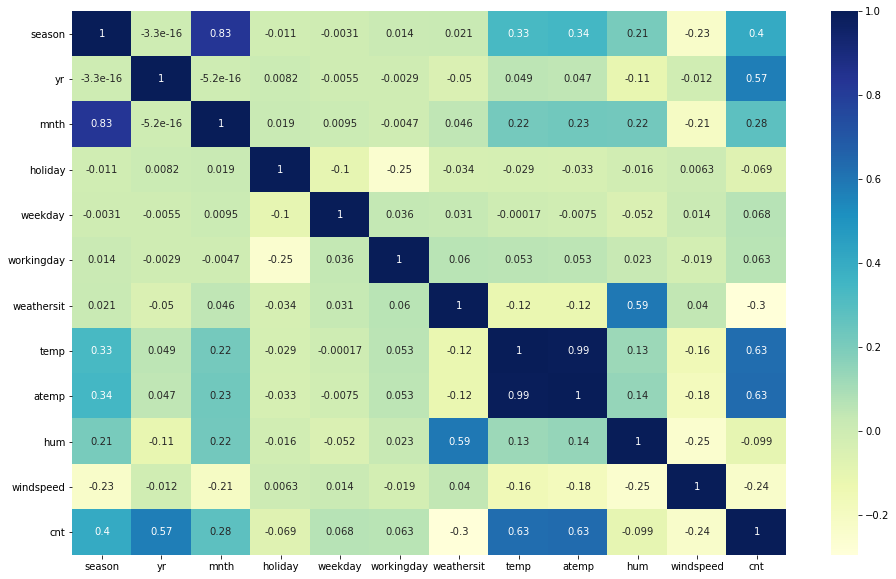

In [14]:
# Correlatio matrix to visulaize which columns are having corelation with cnt
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### From the above heatmap it is clearly observed that 'cnt' column is having 
    - More Positive Correlation with the predictor variables  'atemp', 'temp' followed by 'yr'.
    - More Negative Correlation with 'weathersit', 'windspeed'

### Preparing data for model

#### Now lets convert the numeric categorical to the dummy variables
#### To do that we need to first convert the type of those columns and then convert them to dummy variables

### Why to convert the data type from numeric to category?
    Before answering that, lets look at the syntax of get_dummies.
#### Syntax: 
####    `pandas.get_dummies(data, prefix=None, prefix_sep=’_’, dummy_na=False, columns=None, sparse=False, drop_first=False, 
#### dtype=None)`

#### Lets see the description of some attributes which are rerquired for our question:
#### columns: 
        This attribute specifies the columns that needs to get dummies. Default is None. If not specified the columns it by default takes object, category datatype columns to get dummies.
        
#### drop_first:
        This is default false. It means that we get dummies for all categorical of all 'k' levels. If it is true, then we get the dummies for 'k-1' level which is expected for our model.

In [15]:
# Lets change the data types of some of the columns which needs to get dummy data.
columns_to_get_dummy = ['season', 'mnth', 'weathersit', 'weekday'];
# Convert datatype form numeric to category so that we can get dummies for these columns
bike[columns_to_get_dummy] = bike[columns_to_get_dummy].astype('category')

In [16]:
# Lets check info wether they have converted or not
bike[columns_to_get_dummy].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   mnth        730 non-null    category
 2   weathersit  730 non-null    category
 3   weekday     730 non-null    category
dtypes: category(4)
memory usage: 4.0 KB


In [17]:
# Now, lets creqate dummy variables for the categorical varibles with drop_first=True 
bike = pd.get_dummies(bike, drop_first=True)
bike

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,0,0,...,0,1,0,0,0,1,0,0,1,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,0,0,...,0,1,0,0,0,0,1,0,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,0,0,...,0,1,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
# Now lets check the columns available in our data set after creating dummies
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

#### Since, we used drop_first=True, categorical levels of season, month, weekday, weather were reduced by 1 from their actual levels

### Splitting the data set into training and test data set

In [19]:
# Lets split the data set into training and test data set of 70-30 percentages respectively.
# Use the standard notation for them as df_train, df_test. Sicne, we are having more than one predictor features
# train_test_split returns data frames instead of series data.

# random_state: Controls the shuffling applied to the data before applying the split
# shuffel: Deafult True, so no need to specify it explicitly
df_train, df_test = train_test_split(bike, train_size=0.7, random_state=333);

In [20]:
# Lets check the shape and data in df_train, df_test
print("Training data set : ", df_train.shape);
print("Testing data set : ", df_test.shape);

### Data set was splitted as per our requirement
### 730: Actual total data
### 510: 70% of actual data (Training set)
### 220: 30% of actual data (Testing set)

Training data set :  (510, 30)
Testing data set :  (220, 30)


In [21]:
# Lets see how data looks like in training data set
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0
502,1,0,1,23.130847,27.55605,52.3333,9.166739,7639,1,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.684314,20.218078,23.590696,62.340743,12.771365,4494.103922,0.245098,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.147059,0.150980,0.343137,0.025490
std,0.500487,0.151726,0.465245,7.500110,8.138271,14.418728,5.205888,1948.315655,0.430568,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.354512,0.358381,0.475223,0.157763
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717923,16.744800,51.604150,9.011098,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.233700,12.125057,4508.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327088,72.958300,15.624869,5962.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### If we look at the above data, all of them are numerical data.
#####  But, most of the columns are having data either 0/1 except the columns temp, atemp, hum, windspeed, cnt.
##### So, we need to rescale the data. So, that our predictions gets much more reliable and accurate.

#### So, lets rescale the data using `MinMaxScaling/Normalization` method.

### Why Normalization method is using?
#### Answer:
##### Beacuse, 
    1. Normalization methods makes the data to be present in between 0-1 which looks similar to the other columns data.
    2. It doesnt create any effect or change in the categorical data or dummy data that we have created already.

### Rescaling the features

In [23]:
### Need to do scaling on the training data set. Sicne it was used for training the model

# Create scaler object
scaler = MinMaxScaler();

# Create Columns list required for scaling
columns_req_for_scaling = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'];

# Now, fit and transform the data for the above columns in our dataset
df_train[columns_req_for_scaling] = scaler.fit_transform(df_train[columns_req_for_scaling]);

In [24]:
# Lets check wether the data is scaled or not
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.684314,0.540777,0.515530,0.647696,0.346806,0.514508,0.245098,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.147059,0.150980,0.343137,0.025490
std,0.500487,0.151726,0.465245,0.227939,0.213652,0.149805,0.160182,0.224150,0.430568,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.354512,0.358381,0.475223,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.231105,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646584,0.326920,0.516107,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.758008,0.434607,0.683473,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Now, we can observe that mostly all the columns are sacled in between 0-1. It can be observed by checking the min value and max value of columns

##### Now, our dataset is ready for the training.

### Training the Model

In [25]:
# Lets create the X & Y variables from training data frame for training the model 
y_train = df_train.pop('cnt') # Our target varaiable is cnt, So lets assume it as y_train and rest columns as X_train
X_train = df_train

In [26]:
# Lets see what data is available in X_train
X_train.head()
# We can observe all the columns except cnt is available in X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0,0,1,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0,1,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0,0,1,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0,0,0,...,0,0,0,0,0,0,0,0,0,0
502,1,0,1,0.629300,0.619631,0.543723,0.235894,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.684314,0.540777,0.515530,0.647696,0.346806,0.245098,0.262745,0.241176,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.147059,0.150980,0.343137,0.025490
std,0.500487,0.151726,0.465245,0.227939,0.213652,0.149805,0.160182,0.430568,0.440557,0.428217,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.354512,0.358381,0.475223,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.231105,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646584,0.326920,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.758008,0.434607,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Selecting features using RFE

In [28]:
# Create Linear regression object
lm = LinearRegression()

# Fit the model
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 15 (50% of actual no.of columns available and it is suggestable)
# By passing the fitted model with it
rfe = RFE(lm, 15)

# get the fitted rfe
rfe = rfe.fit(X_train, y_train)

In [29]:
# List down all the 15 outcomes given by the RFE with rankings and its significant boolean
# support_ : provides wether that column is supported for the model or not
# ranking_ : provides the ranking of the models suitable for the model to pick
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 13),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 4),
 ('mnth_5', False, 2),
 ('mnth_6', False, 3),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 14),
 ('weekday_1', False, 6),
 ('weekday_2', False, 12),
 ('weekday_3', False, 10),
 ('weekday_4', False, 11),
 ('weekday_5', False, 9),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [30]:
cols_supports_model = X_train.columns[rfe.support_]
cols_supports_model

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [31]:
cols_not_supported = X_train.columns[~rfe.support_]
cols_not_supported

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [32]:
# Remove columns which are not supported for model and store them 
# so that it will be used while testing the model with test dataset
X_train = X_train[cols_supports_model];

In [33]:
Cols_deleted = []
for val in cols_not_supported.values:
    Cols_deleted.append(val);

In [34]:
Cols_deleted

['holiday',
 'mnth_2',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_11',
 'mnth_12',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5']

In [35]:
X_train.head()

,yr,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
650,1,0,0.416433,0.409971,0.513852,0.255118,0,0,1,0,0,1,1,0,0
212,0,1,0.887856,0.819376,0.572294,0.276919,0,1,0,0,0,0,0,0,0
714,1,0,0.378013,0.381804,0.871429,0.161523,0,0,1,0,0,0,0,1,0
8,0,0,0.098690,0.048706,0.451083,0.700017,0,0,0,0,0,0,0,0,0
502,1,1,0.629300,0.619631,0.543723,0.235894,1,0,0,0,0,0,0,0,0


In [36]:
### Common method to print the VIF continously
def printVIF(trainingDataSet, constantVariable):
    vif = pd.DataFrame();
    actualDataSet = trainingDataSet;
    dataSetWithoutConstant = actualDataSet.drop(constantVariable, axis=1);
    X = dataSetWithoutConstant;
    vif['Features'] = X.columns;
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])];
    vif['VIF'] = round(vif['VIF'], 2);
    vif = vif.sort_values(by = "VIF", ascending = False);
    print(vif);

In [37]:
# Fixed target variable for our model
constant_variable = 'const';

##### Building the Model with the variables supported for model

In [38]:
# To build the model lets add constant to the X_train so that our model soent pass through origin
# store it in new variable say X_train_lm
X_train_lm = sm.add_constant(X_train);

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit();

In [39]:
# print the parameters given by the model
lm.params

const           0.194033
yr              0.228351
workingday      0.041578
temp            0.435856
atemp           0.057604
hum            -0.178591
windspeed      -0.183893
season_2        0.129556
season_3        0.079386
season_4        0.153721
mnth_3          0.047424
mnth_9          0.100011
mnth_10         0.054234
weekday_6       0.055457
weathersit_2   -0.047287
weathersit_3   -0.271163
dtype: float64

In [40]:
# Lets look at the summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          1.28e-186
Time:                        04:12:11   Log-Likelihood:                 509.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     494   BIC:                            -919.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1940      0.030      6.526      0.000       0.136       0.252
yr               0.2284      0.008     27.972      0.000       0.212       0.244
workingday       0.0416      0.011      3.762      0.000       0.020       0.063
temp             0.4359      0.134      3.255      0.001       0.173       0.699
atemp            0.0576      0.137      0.420      0.675      -0.212       0.327
hum             -0.1786      0.037     -4.787      0.000      -0.252      -0.105
windspeed       -0.1839      0.028     -6.572      0.000      -0.239      -0.129
season_2         0.1296      0.015      8.542      0.000       0.100       0.159
season_3         0.0794      0.021      3.817      0.000       0.039       0.120
season_4         0.1537      0.014     10.818      0.000       0.126       0.182
mnth_3           0.0474      0.016      2.979      0.003       0.016       0.079
mnth_9           0.1000      0.016      6.307      0.000       0.069       0.131
mnth_10          0.0542      0.018      3.040      0.002       0.019       0.089
weekday_6        0.0555      0.014      3.868      0.000       0.027       0.084
weathersit_2    -0.0473      0.011     -4.442      0.000      -0.068      -0.026
weathersit_3    -0.2712      0.028     -9.547      0.000      -0.327      -0.215
==============================================================================
Omnibus:                       92.219   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.888
Skew:                          -0.929   Prob(JB):                     1.08e-48
Kurtosis:                       5.635   Cond. No.                         85.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Since we cannot take the decision based on the only pf values for feature removal. 
# Lets calculate the VIF for the X_train_lm columns
printVIF(X_train_lm, constant_variable);

        Features     VIF
2           temp  383.99
3          atemp  362.65
4            hum   17.63
7       season_3    7.06
5      windspeed    4.72
1     workingday    4.65
6       season_2    3.50
8       season_4    3.00
13  weathersit_2    2.16
0             yr    2.03
12     weekday_6    1.80
11       mnth_10    1.66
10        mnth_9    1.28
9         mnth_3    1.20
14  weathersit_3    1.17


##### From above model summary and VIF data we can see that 
    High p-value features are `atemp`
    High VIF value feature are `temp`
    
    R-Square value is 84.8%
    
##### Since, we follow one of the golden thumb rule is to remove the feature whic is having more p-value before removing the High VIF value.
##### So, lets remove the colum `atemp` from the model and lets rebuild model again

In [42]:
# Droping feature 'atemp' from training data set
X_train_lm = X_train_lm.drop(['atemp'], axis=1)
X_train_lm.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [43]:
# Add deleted column into our Cols_deleted array for future use
Cols_deleted.append('atemp');
Cols_deleted

['holiday',
 'mnth_2',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_11',
 'mnth_12',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'atemp']

In [44]:
# Running the linear model again
lm = sm.OLS(y_train,X_train_lm).fit();
# Print summary of rebuilded model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          1.00e-187
Time:                        04:13:13   Log-Likelihood:                 509.46
No. Observations:                 510   AIC:                            -988.9
Df Residuals:                     495   BIC:                            -925.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1949      0.030      6.575      0.000       0.137       0.253
yr               0.2283      0.008     27.994      0.000       0.212       0.244
workingday       0.0416      0.011      3.764      0.000       0.020       0.063
temp             0.4903      0.034     14.631      0.000       0.424       0.556
hum             -0.1780      0.037     -4.778      0.000      -0.251      -0.105
windspeed       -0.1861      0.027     -6.779      0.000      -0.240      -0.132
season_2         0.1297      0.015      8.557      0.000       0.100       0.159
season_3         0.0784      0.021      3.797      0.000       0.038       0.119
season_4         0.1540      0.014     10.852      0.000       0.126       0.182
mnth_3           0.0476      0.016      2.991      0.003       0.016       0.079
mnth_9           0.1000      0.016      6.313      0.000       0.069       0.131
mnth_10          0.0543      0.018      3.046      0.002       0.019       0.089
weekday_6        0.0555      0.014      3.878      0.000       0.027       0.084
weathersit_2    -0.0474      0.011     -4.461      0.000      -0.068      -0.027
weathersit_3    -0.2715      0.028     -9.572      0.000      -0.327      -0.216
==============================================================================
Omnibus:                       91.666   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.140
Skew:                          -0.924   Prob(JB):                     2.60e-48
Kurtosis:                       5.626   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Lets print the VIF for the current columns available in the training data set
printVIF(X_train_lm, constant_variable);

        Features    VIF
2           temp  23.20
3            hum  17.34
6       season_3   6.97
1     workingday   4.65
4      windspeed   4.56
5       season_2   3.50
7       season_4   2.99
12  weathersit_2   2.15
0             yr   2.03
11     weekday_6   1.80
10       mnth_10   1.66
9         mnth_9   1.28
8         mnth_3   1.20
13  weathersit_3   1.17


##### From the above summary and model we can derive following data
    High VIF value is `temp`
    No features with high p-values (>0.05)
    
    R-Square is still same 84.2%
    
##### So, now lets remove the columm `temp` which is having more VIF and rebuild our model again

In [46]:
# Droping feature 'temp' from training data set
X_train_lm = X_train_lm.drop(['temp'], axis=1)
X_train_lm.columns

Index(['const', 'yr', 'workingday', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [47]:
# Add deleted column into our Cols_deleted array for future use
Cols_deleted.append('temp');
Cols_deleted

['holiday',
 'mnth_2',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_11',
 'mnth_12',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'atemp',
 'temp']

In [48]:
# Running the linear model again
lm = sm.OLS(y_train,X_train_lm).fit();
# Print summary of rebuilded model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     130.0
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          2.21e-150
Time:                        04:14:17   Log-Likelihood:                 417.82
No. Observations:                 510   AIC:                            -807.6
Df Residuals:                     496   BIC:                            -748.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2787      0.035      8.017      0.000       0.210       0.347
yr               0.2425      0.010     25.048      0.000       0.224       0.262
workingday       0.0429      0.013      3.250      0.001       0.017       0.069
hum             -0.0663      0.044     -1.521      0.129      -0.152       0.019
windspeed       -0.1907      0.033     -5.809      0.000      -0.255      -0.126
season_2         0.2714      0.014     19.480      0.000       0.244       0.299
season_3         0.3192      0.015     21.382      0.000       0.290       0.349
season_4         0.2021      0.016     12.251      0.000       0.170       0.235
mnth_3           0.0531      0.019      2.795      0.005       0.016       0.090
mnth_9           0.0936      0.019      4.942      0.000       0.056       0.131
mnth_10          0.1077      0.021      5.162      0.000       0.067       0.149
weekday_6        0.0454      0.017      2.655      0.008       0.012       0.079
weathersit_2    -0.0724      0.013     -5.773      0.000      -0.097      -0.048
weathersit_3    -0.3285      0.034     -9.779      0.000      -0.395      -0.262
==============================================================================
Omnibus:                       70.371   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.209
Skew:                          -0.723   Prob(JB):                     4.91e-37
Kurtosis:                       5.403   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Lets print the VIF for the current columns available in the training data set
printVIF(X_train_lm, constant_variable);

        Features    VIF
2            hum  12.54
1     workingday   4.62
3      windspeed   4.49
6       season_4   2.79
5       season_3   2.47
4       season_2   2.05
11  weathersit_2   2.02
0             yr   1.98
10     weekday_6   1.80
9        mnth_10   1.60
8         mnth_9   1.28
7         mnth_3   1.19
12  weathersit_3   1.12


##### From the above summary and VIF we can say that:
    High P-value feature is `hum`
    High VIF feature is `hum`
    
    R-Square value was changed from 84.2 to 77.3 percentage
   
##### S0, lets remove the colum `hum` from the model and lets rebuild model again

In [50]:
# Droping feature 'hum' from training data set
X_train_lm = X_train_lm.drop(['hum'], axis=1)
X_train_lm.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [51]:
# Add deleted column into our Cols_deleted array for future use
Cols_deleted.append('hum');
Cols_deleted

['holiday',
 'mnth_2',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_8',
 'mnth_11',
 'mnth_12',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'atemp',
 'temp',
 'hum']

In [52]:
# Running the linear model again
lm = sm.OLS(y_train,X_train_lm).fit();
# Print summary of rebuilded model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     140.3
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          5.75e-151
Time:                        04:16:25   Log-Likelihood:                 416.63
No. Observations:                 510   AIC:                            -807.3
Df Residuals:                     497   BIC:                            -752.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2359      0.020     11.580      0.000       0.196       0.276
yr               0.2439      0.010     25.256      0.000       0.225       0.263
workingday       0.0435      0.013      3.293      0.001       0.018       0.069
windspeed       -0.1756      0.031     -5.604      0.000      -0.237      -0.114
season_2         0.2684      0.014     19.436      0.000       0.241       0.295
season_3         0.3166      0.015     21.320      0.000       0.287       0.346
season_4         0.1996      0.016     12.143      0.000       0.167       0.232
mnth_3           0.0561      0.019      2.965      0.003       0.019       0.093
mnth_9           0.0904      0.019      4.797      0.000       0.053       0.127
mnth_10          0.1059      0.021      5.077      0.000       0.065       0.147
weekday_6        0.0460      0.017      2.684      0.008       0.012       0.080
weathersit_2    -0.0833      0.010     -8.068      0.000      -0.104      -0.063
weathersit_3    -0.3475      0.031    -11.133      0.000      -0.409      -0.286
==============================================================================
Omnibus:                       70.111   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.749
Skew:                          -0.724   Prob(JB):                     1.68e-36
Kurtosis:                       5.378   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Lets print the VIF for the current columns available in the training data set
printVIF(X_train_lm, constant_variable);

        Features   VIF
2      windspeed  3.87
1     workingday  3.73
5       season_4  2.33
4       season_3  1.97
0             yr  1.96
3       season_2  1.73
9      weekday_6  1.61
8        mnth_10  1.59
10  weathersit_2  1.54
7         mnth_9  1.27
6         mnth_3  1.19
11  weathersit_3  1.08


##### From the above summary and VIF we can say that:
    NO Feature having p-value (> 0.05)
    No High VIF feature
    
    R-Square value was changed slightly(negligable) from 77.3 to 77.2 percentage

#### Since we are not having any High VIF and High P-Values we can stop modeling here and can make this as our best fit model.
#### With 
    1. R-Square : 77.2%
    2. Total Coefficients : 12 + 1 Constant

In [54]:
# Coeffficents of model
lm.params

const           0.235851
yr              0.243876
workingday      0.043512
windspeed      -0.175637
season_2        0.268363
season_3        0.316649
season_4        0.199574
mnth_3          0.056134
mnth_9          0.090393
mnth_10         0.105879
weekday_6       0.045960
weathersit_2   -0.083298
weathersit_3   -0.347539
dtype: float64

### Residual Analysis

In [55]:
# Get the predicted values of y from model using training data set
y_train_pred = lm.predict(X_train_lm)

# Calculate residuals 
res = (y_train - y_train_pred)

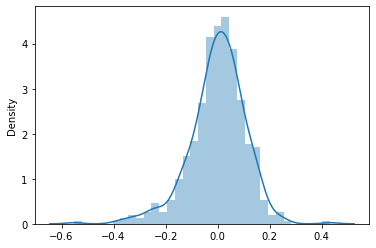

In [74]:
# Plot the residuals
sns.distplot(res);

#### We can observe that residuals are centered around the mean of 0 and it is normally distributed.

#### Prediction and evaluation on Test data

In [57]:
# Lets do pre processing on the test data set as we did it on training data set
# we do rescaling on test dataset for columns required for sacling and do transform on it instead of fit again
# Now, fit and transform the data for the above columns in our dataset
df_test[columns_req_for_scaling] = scaler.fit_transform(df_test[columns_req_for_scaling]);
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.000000,0.000000,0.214684,0.517945,0.060844,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.529437,0.534900,0.311966,0.365150,0.881481,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.964569,0.950552,0.415751,0.185998,0.528077,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.696625,0.666813,0.352259,0.539258,0.839523,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.384393,0.409075,0.447497,0.010221,0.411205,0,0,...,0,1,0,1,0,0,0,0,1,0


In [58]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.681818,0.537824,0.525029,0.509144,0.363275,0.511375,0.268182,0.245455,...,0.072727,0.104545,0.154545,0.145455,0.118182,0.172727,0.131818,0.127273,0.322727,0.036364
std,0.501120,0.198531,0.466833,0.244145,0.225092,0.202059,0.212324,0.242261,0.444023,0.431338,...,0.260281,0.306665,0.362295,0.353363,0.323559,0.378873,0.339064,0.334038,0.468586,0.187620
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.331585,0.341554,0.355464,0.211583,0.340601,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.544384,0.544877,0.508242,0.338721,0.518127,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750601,0.713683,0.649573,0.481946,0.691311,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# Now lets create y_test, X_test data sets for evalution
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
# Lets add constant for X_test for fitting model on test data set
X_test_lm = sm.add_constant(X_test);

In [61]:
# Columns before dropping deleted columns from final model
X_test_lm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [62]:
# Remove columns that are not available in the final model so that our predictions will be accurate and matches with final model
X_test_lm = X_test_lm.drop(Cols_deleted, axis=1)
X_test_lm.columns

Index(['const', 'yr', 'workingday', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [63]:
# Now predict the model based on the test data set using the final model obj
y_test_pred = lm.predict(X_test_lm)

### Assumptions

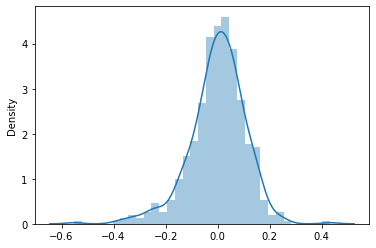

In [73]:
### Residuals are normally distributed
# Get the predicted values of y from model using training data set
y_train_pred = lm.predict(X_train_lm)

# Calculate residuals 
res = (y_train - y_train_pred)
# Plot the residuals
sns.distplot(res);

#### We can observe that residuals are centered around the mean of 0 and it is normally distributed.

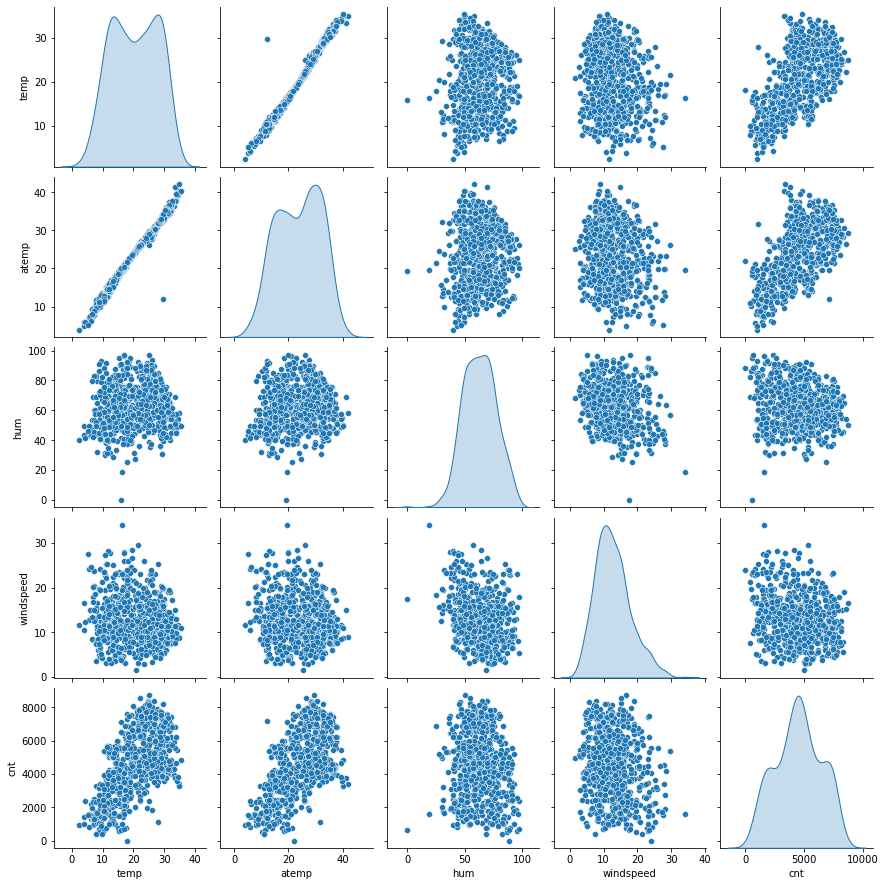

In [75]:
### There is a linear relationship between X & Y
bike_assump = bike[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(bike_assump, diag_kind='kde')
plt.show()

##### We can see from above graph that there is a linear relationship between X('temp', 'atemp') & y('cnt')

In [76]:
#### There is no multicollinearity between the predictor variables in the final model
printVIF(X_train_lm, constant_variable);

        Features   VIF
2      windspeed  3.87
1     workingday  3.73
5       season_4  2.33
4       season_3  1.97
0             yr  1.96
3       season_2  1.73
9      weekday_6  1.61
8        mnth_10  1.59
10  weathersit_2  1.54
7         mnth_9  1.27
6         mnth_3  1.19
11  weathersit_3  1.08


##### We can observe that all of the feature variables in the final model are having VIF less than 5. Hence we can say that there is no collinearity between the predictors

### Model Evaluation

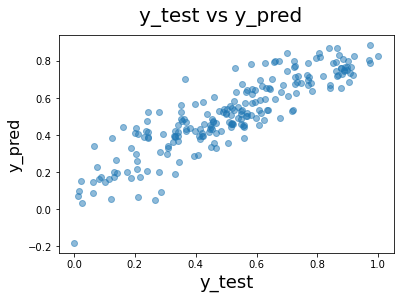

In [77]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#### From the above graph we can say that spread of the y_test and y_pred are linear and high nice spread among them.

### Analyszing the R-Square for Test and Training data Set

In [71]:
# Calculate the R-Square for the training set
train_r2_score = r2_score(y_true = y_train, y_pred = y_train_pred);
train_r2_score

0.772109084164218

In [72]:
# Calculate the R-Square for the predicted set
test_r2_score = r2_score(y_true = y_test, y_pred = y_test_pred);
test_r2_score

0.7846884435823199

### Conclusion

#### Hence, It is observed that our R-Squares values for training and predicted data sets are similar.
#### Our model is best fit for our data prediction.

### Final MLR line is as follows

### cnt = 0.235851 + (yr * 0.243876) + (workingday * 0.043512) - (windspeed * 0.175637) + (season_2 * 0.268363) + 
###            (season_3 * 0.316649) + (season_4 * 0.199574) + (mnth_3 * 0.056134) + (mnth_9 * 0.090393) +
###            (mnth_10 * 0.105879) + (weekday_6 * 0.045960) - (weathersit_2 * 0.083298) - (weathersit_3 * 0.347539)

#### Above equation interpretations
    cnt: Total no.of biker users count and it is the target variable in our model
    yr: Year in which bike was rented/used. Unit change in year causes the 0.243876 units change in users count
    workingday: Wether the bike rented day is holiday or workingday. Unit increase in workingday increases 0.043512 unit changes in users count
    windspeed: Unit increase in windspeed decreases 0.175637 units in users count
    season_2: Season_2 is summer. Unit increase in season_2 increases 0.268363 units in users count
    season_3: season_3 is fall. Unit increase in season_3 increases 0.316649 units in users count
    season_4: season_4 is winter. Unit increase in season_4 increases 0.199574 units in user count
    mnth_3: mnth_3 is march. Unit increase in mnth_3 increases 0.056134 units in users count
    mnth_9: mnth_9 is september. Unit increase in mnth_9 increases 0.090393 units in users count
    mnth_10: mnth_10 is october. Unit increase in mnth_10 increases 0.105879 units in users count
    weekday_6: weekday_6 is friday. Unit increase in weekday_6 increases 0.045960 units in users count
    weathersit_2: unit increase in weathersit_2 decreases 0.083298 units in users count
    weathersit_3: unit increase in weathersit_3 decreases 0.347539 units in users count

#### From the above equation for the obtained model top 3 predictor variables are 
####  `season_3` , `season_2`,  `yr`  with its coefficients 0.316649, 0.268363, 0.243876 respectively

#### where as `weathersit_3`, `windspeed`, `weathersit_2` are negatively related with target variable with its coefficients 0.347539, 0.175637, 0.083298